### *Enhancing Sniffing Detection in IoT Home Wi-Fi Networks: An Ensemble Learning Approach with NMS*

In [2]:
import pandas as pd

df = pd.read_csv('../Dataset/sniff_dataset.csv')
# Display information about the DataFrame
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CPU_Total            12000 non-null  float64
 1   CPU_P1               12000 non-null  float64
 2   CPU_P2               12000 non-null  float64
 3   CPU_P3               12000 non-null  float64
 4   CPU_P4               12000 non-null  float64
 5   Disk_wrVolume        12000 non-null  float64
 6   Disk_wrSpeed         12000 non-null  float64
 7   Disk_wraccessVolume  12000 non-null  float64
 8   Disk_wraccessSpeed   12000 non-null  float64
 9   Load_1min            12000 non-null  float64
 10  Load_5min            12000 non-null  float64
 11  Load_15min           12000 non-null  float64
 12  Mem_Avail%           12000 non-null  float64
 13  Mem_Avail            12000 non-null  float64
 14  Mem_freePhysical%    12000 non-null  float64
 15  Mem_freePhysical    

## Preprocessing
Preprocessing is an important stage to decrease errors. The first step is data cleaning

In [3]:
# Create lists to store information for each feature
features = []
missing_data = []
unique_values = []
average_values = []
std_dev_values = []
for column in df.columns:

    # Find missing data for the feature
    missing_count = int(df[column].isnull().sum())
    
    # Get unique values for the feature
    unique_count = int(df[column].nunique())
    
    # Calculate statistics for numerical features
    if pd.api.types.is_numeric_dtype(df[column]):
        average = df[column].mean()
        std_dev = df[column].std()
    else:
        minimum = maximum = None
        average = std_dev = None

    features.append(column)
    missing_data.append(missing_count)
    unique_values.append(unique_count)
    average_values.append(average)
    std_dev_values.append(std_dev)

summary_data = {
    'Feature': features,
    'Missing Data': missing_data,
    'Unique Values': unique_values,
    'Average': average_values,
    'Standard Deviation': std_dev_values
}

print(pd.DataFrame(summary_data))


                Feature  Missing Data  Unique Values       Average  \
0             CPU_Total             0            224  9.161472e+00   
1                CPU_P1             0            268  7.681668e+00   
2                CPU_P2             0            420  1.033966e+01   
3                CPU_P3             0            476  9.395314e+00   
4                CPU_P4             0            415  9.055309e+00   
5         Disk_wrVolume             0           9573  2.071047e+06   
6          Disk_wrSpeed             0          10011  3.453712e+04   
7   Disk_wraccessVolume             0           7927  2.771548e+01   
8    Disk_wraccessSpeed             0           3747  4.622554e-01   
9             Load_1min             0           1339  3.925369e-01   
10            Load_5min             0           1233  3.850693e-01   
11           Load_15min             0           1098  3.636839e-01   
12           Mem_Avail%             0            301  4.720735e+01   
13            Mem_Av

Data Cleaning: Removing Unnecessary Columns

In [6]:
df=pd.read_csv('../Dataset/sniff_dataset.csv')
df=df.drop(columns=['Mem_freeSwap%','Mem_freeSwap'],axis=1)
modified_file_path = '../Dataset/sniff_dataset_28f.csv'
df.to_csv(modified_file_path, index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CPU_Total            12000 non-null  float64
 1   CPU_P1               12000 non-null  float64
 2   CPU_P2               12000 non-null  float64
 3   CPU_P3               12000 non-null  float64
 4   CPU_P4               12000 non-null  float64
 5   Disk_wrVolume        12000 non-null  float64
 6   Disk_wrSpeed         12000 non-null  float64
 7   Disk_wraccessVolume  12000 non-null  float64
 8   Disk_wraccessSpeed   12000 non-null  float64
 9   Load_1min            12000 non-null  float64
 10  Load_5min            12000 non-null  float64
 11  Load_15min           12000 non-null  float64
 12  Mem_Avail%           12000 non-null  float64
 13  Mem_Avail            12000 non-null  float64
 14  Mem_freePhysical%    12000 non-null  float64
 15  Mem_freePhysical     12000 non-null 

Besides, many outliers are replaced with the maximum and minimum using the LOF algorithm.

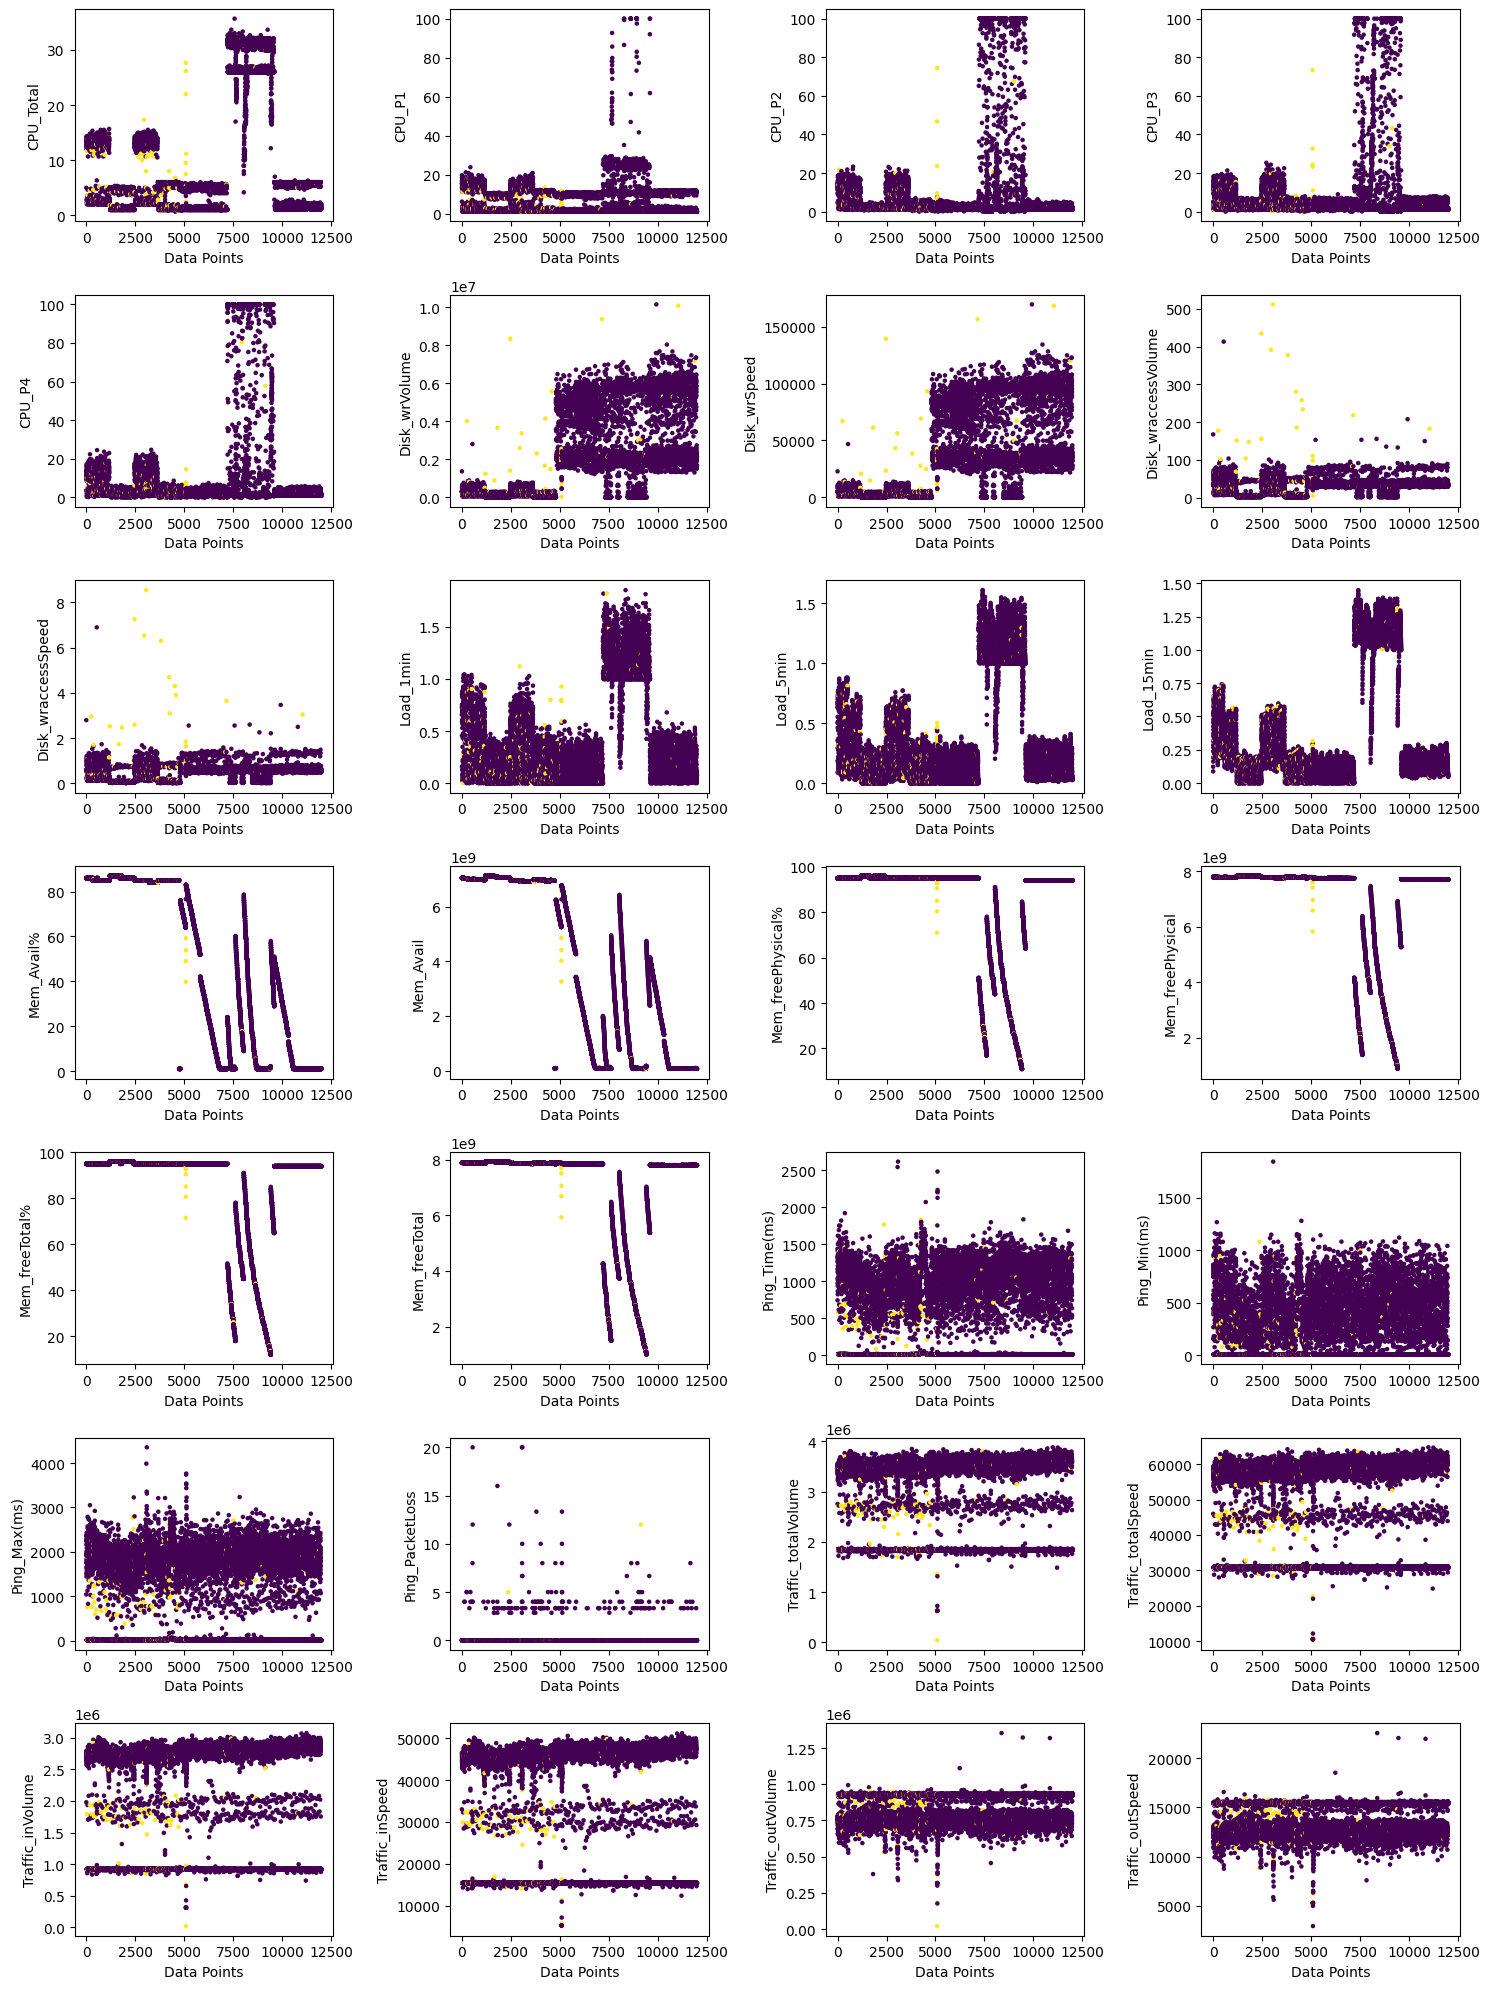

Modified data (replaced outliers) saved to ../Dataset/modified_28f.csv


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load your data (replace 'your_data.csv' with your actual file)
df = pd.read_csv('../Dataset/sniff_dataset_28f.csv')

# Exclude the 'Class' feature for LOF analysis
numeric_columns = df.drop(columns=['Class']).select_dtypes(include=['number'])

# Fit the LOF model for outlier detection
lof_model = LocalOutlierFactor(n_neighbors=4, contamination=0.02)  # You can adjust these parameters
outlier_scores = lof_model.fit_predict(numeric_columns)

# Create a boolean array indicating whether a data point is an outlier
outliers = outlier_scores == -1

# Plot all numeric features in one graph
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(7, 4, i)  # Assuming you have 9 or fewer numeric features, adjust as needed
    plt.scatter(range(len(df)), df[col], c=outliers, cmap='viridis', s=5, label='Data Points')
    plt.xlabel('Data Points')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Impute outliers with the maximum or minimum inlier value for each feature
for col in numeric_columns.columns:
    inlier_max = np.max(df.loc[~outliers, col])
    inlier_min = np.min(df.loc[~outliers, col])

    # Replace outliers with the maximum inlier value if higher than the maximum
    df.loc[(outliers) & (df[col] > inlier_max), col] = inlier_max

    # Replace outliers with the minimum inlier value if lower than the minimum
    df.loc[(outliers) & (df[col] < inlier_min), col] = inlier_min

# Save the modified DataFrame to a CSV file
modified_file_path = '../Dataset/modified_28f.csv'
df.to_csv(modified_file_path, index=False)

print(f"Modified data (replaced outliers) saved to {modified_file_path}")

**Correlation Analysis**
Next step is correlation analysis. Several features with a coefficient of 1.  may have multicollinearity, which can affect feature importance. So, An additional 18-feature dataset is created with perfect multicollinearity removed.

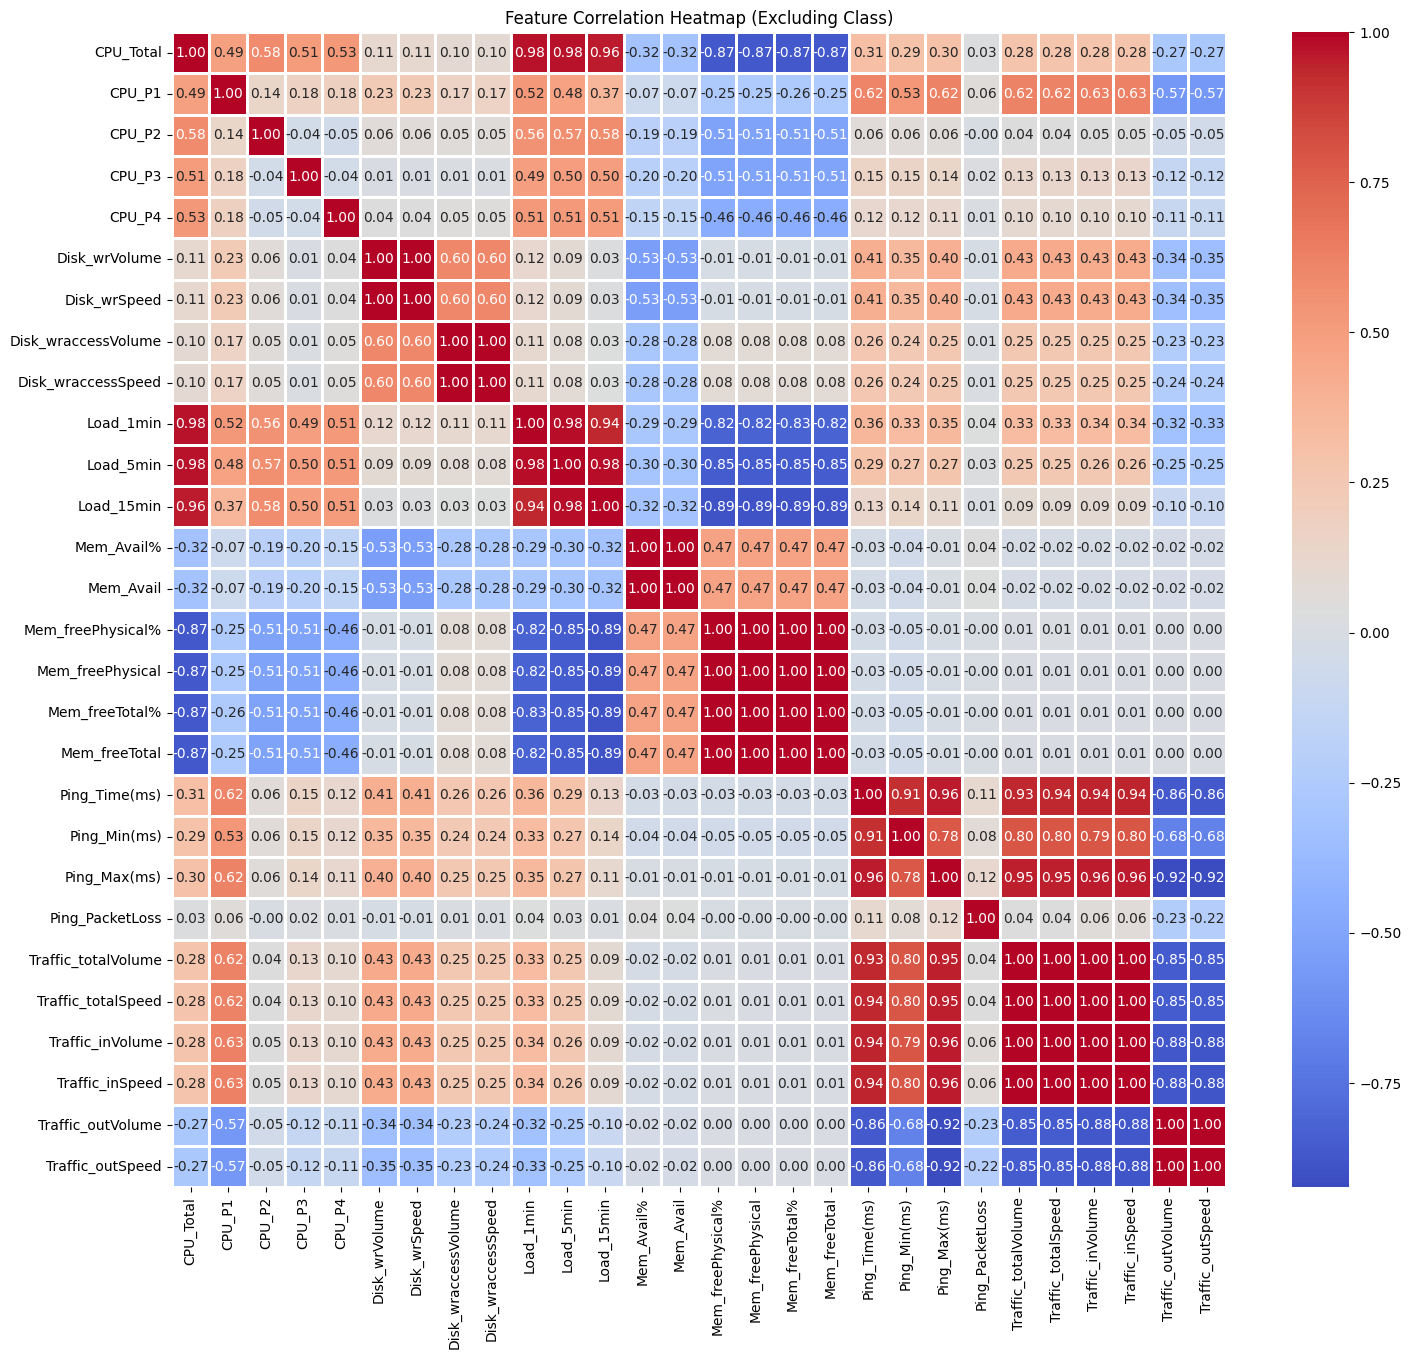

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (replace 'your_data.csv' with your actual file)
df = pd.read_csv('../Dataset/modified_28f.csv')

# Exclude the 'Class' feature for the heatmap
numeric_columns = df.drop(columns=['Class']).select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(17, 15))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.8)

# Show the plot
plt.title('Feature Correlation Heatmap (Excluding Class)')
plt.show()

#### Data Preparation: Feature Selection and Train-Test Split

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
df1=pd.read_csv("../Dataset/modified_28f.csv")
X1 = df1.drop('Class', axis=1)  # Features
y1 = df1['Class']  # Target variable

# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
training_set_path = '../Dataset/train_28f.csv'
training_set = pd.concat([X_train1, y_train1], axis=1)
training_set.to_csv(training_set_path, index=False)

test_set_path = '../Dataset/test_28f.csv'
test_set = pd.concat([X_test1, y_test1], axis=1)
test_set.to_csv(test_set_path, index=False)

X_train, X_extra, y_train, y_extra = train_test_split(X1, y1, test_size=0.2, random_state=42)
extra_set = pd.concat([X_extra, y_extra], axis=1)
extra_set.to_csv('../Dataset/extra_18f.csv', index=False)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv('../Dataset/modified_28f.csv')
df = df.drop(columns=[
    'Disk_wrSpeed', 
    'Disk_wraccessSpeed', 
    'Mem_Avail%',  
    'Mem_freePhysical%', 
    'Mem_freePhysical', 
    'Mem_freeTotal%', 
    'Traffic_totalVolume', 
    'Traffic_totalSpeed', 
    'Traffic_inSpeed', 
    'Traffic_outSpeed'
])
df.info()
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

training_set_path = '../Dataset/train_18f.csv'
training_set = pd.concat([X_train, y_train], axis=1)
training_set.to_csv(training_set_path, index=False)

test_set_path = '../Dataset/test_18f.csv'
test_set = pd.concat([X_test, y_test], axis=1)
test_set.to_csv(test_set_path, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CPU_Total            12000 non-null  float64
 1   CPU_P1               12000 non-null  float64
 2   CPU_P2               12000 non-null  float64
 3   CPU_P3               12000 non-null  float64
 4   CPU_P4               12000 non-null  float64
 5   Disk_wrVolume        12000 non-null  float64
 6   Disk_wraccessVolume  12000 non-null  float64
 7   Load_1min            12000 non-null  float64
 8   Load_5min            12000 non-null  float64
 9   Load_15min           12000 non-null  float64
 10  Mem_Avail            12000 non-null  float64
 11  Mem_freeTotal        12000 non-null  float64
 12  Ping_Time(ms)        12000 non-null  float64
 13  Ping_Min(ms)         12000 non-null  float64
 14  Ping_Max(ms)         12000 non-null  float64
 15  Ping_PacketLoss      12000 non-null 

### Decision Tree Classifier 
##### 28 Features, 18 features, 7 features

Decision tree 28 features
Mean Accuracy: 99.80%
Mean Precision: 99.81%
Mean Recall: 99.80%
Mean F1 Score: 99.80%
Training Time: 0.94 seconds

Test Metrics:
Accuracy: 99.67%
Precision: 99.67%
Recall: 99.67%
F1 Score: 99.67%


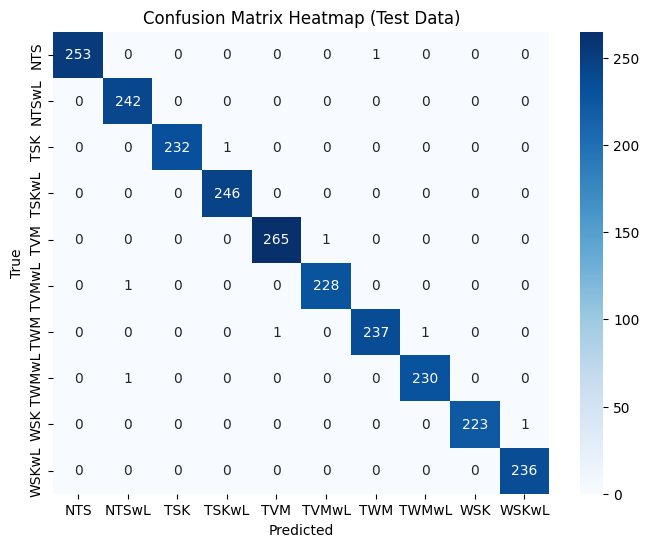

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("Decision tree 28 features")
train_file_path = '../Dataset/train_28f.csv'
train_data = pd.read_csv(train_file_path)

test_file_path = '../Dataset/test_28f.csv'
test_data = pd.read_csv(test_file_path)

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop List for 18 features
features_to_drop = ['Class']

X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=7, random_state=42)

# Perform 10-fold cross-validation on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Record the start time
start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    decision_tree_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = decision_tree_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Record the end time
end_time = time.time()

mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")

# Calculate and print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Train the model on the entire training data
decision_tree_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = decision_tree_model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')

# Print test metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")

# Plot Confusion Matrix Heatmap for the test data
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()


In [26]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Decision tree 18 features
Mean Accuracy: 99.82%
Mean Precision: 99.82%
Mean Recall: 99.82%
Mean F1 Score: 99.82%
Training Time: 0.93 seconds

Test Metrics:
Accuracy: 99.62%
Precision: 99.63%
Recall: 99.62%
F1 Score: 99.63%


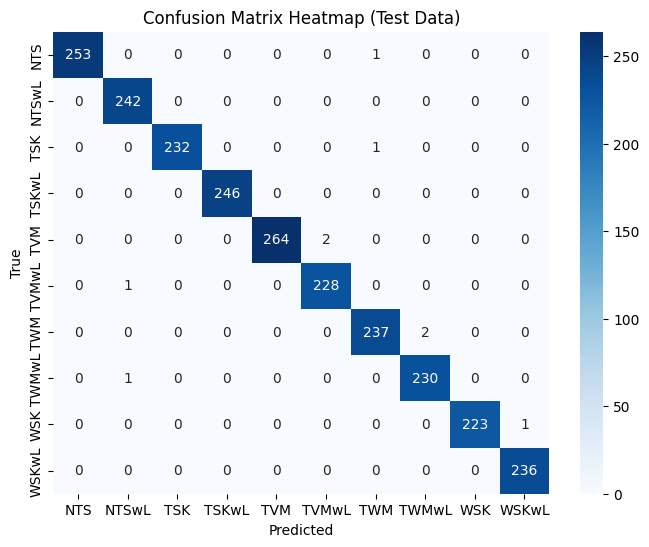

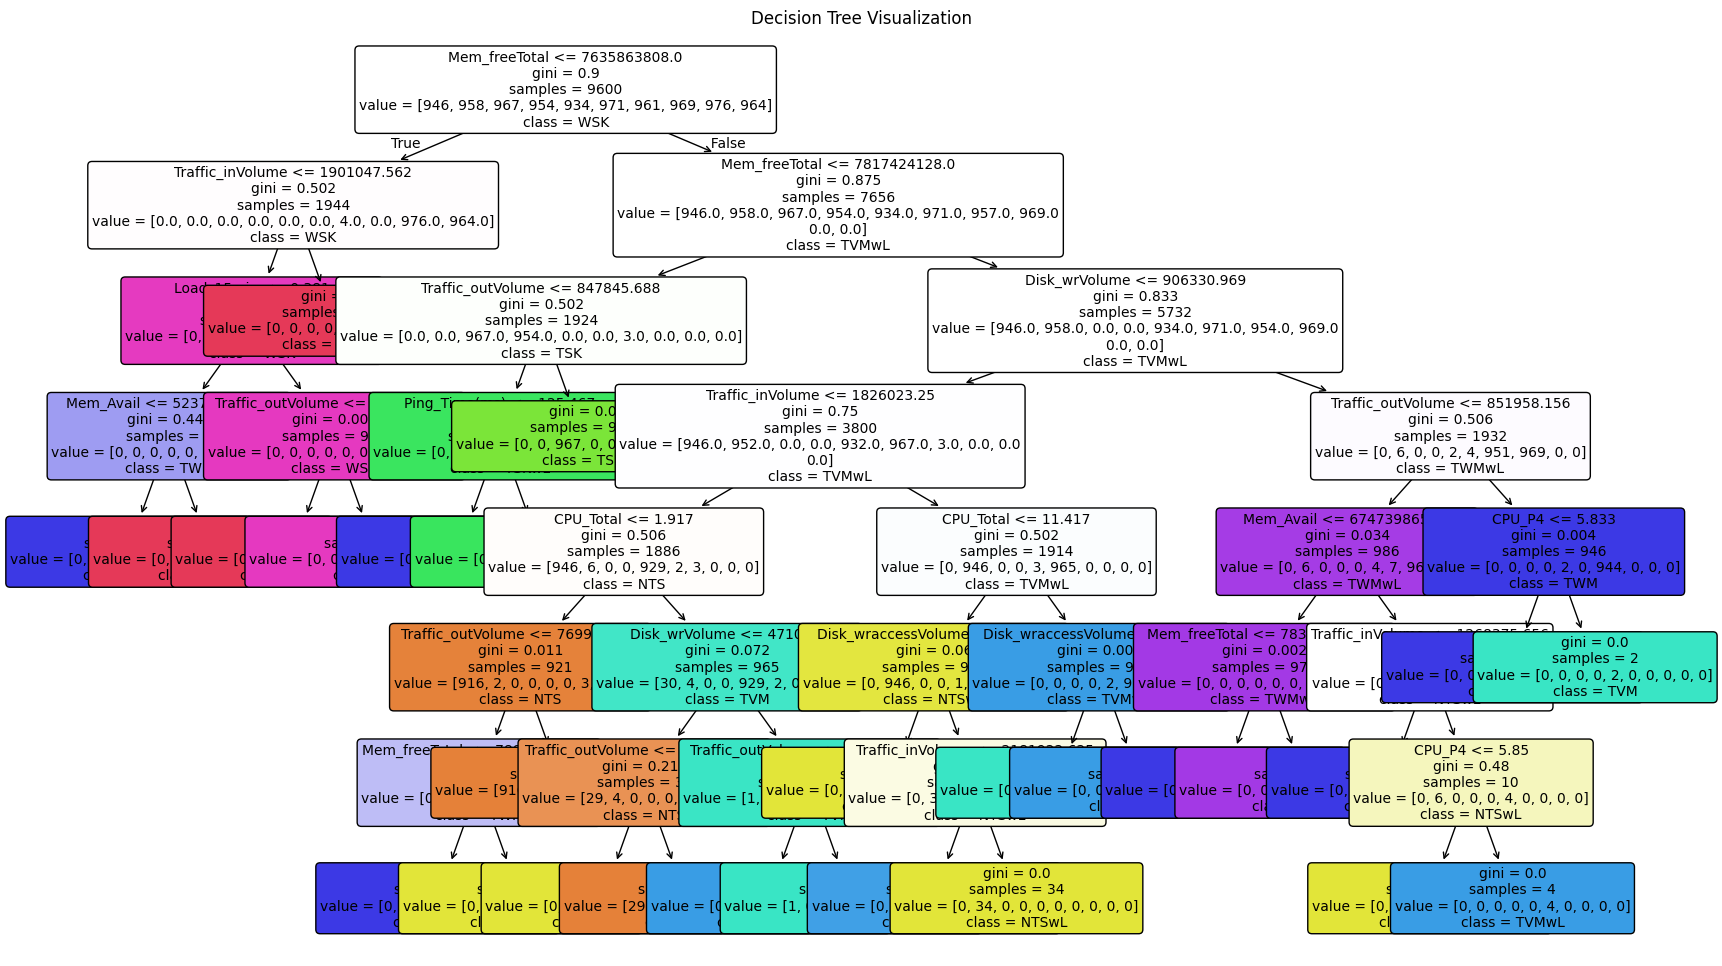

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import time

print("Decision tree 18 features")
train_file_path = '../Dataset/train_18f.csv'
train_data = pd.read_csv(train_file_path)

test_file_path = '../Dataset/test_18f.csv'
test_data = pd.read_csv(test_file_path)

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop List for 18 features
features_to_drop = ['Class']

X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=7, random_state=42)

# Perform 10-fold cross-validation on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Record the start time
start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    decision_tree_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = decision_tree_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Record the end time
end_time = time.time()

mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")

# Calculate and print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Train the model on the entire training data
decision_tree_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = decision_tree_model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')

# Print test metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")

# Plot Confusion Matrix Heatmap for the test data
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()

plt.figure(figsize=(20, 12))
plot_tree(
    decision_tree_model,
    feature_names=X_train.columns,
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

print("Decision tree 7 features")
train_file_path = '../Dataset/train_18f.csv'
train_data = pd.read_csv(train_file_path)


test_file_path = '../Dataset/test_18f.csv'
test_data = pd.read_csv(test_file_path)

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

#7 feature model
features_to_drop = ['Class', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4', 'Load_1min', 'Load_5min', 'Load_15min', 'Ping_Time(ms)', 'Ping_Min(ms)', 'Ping_Max(ms)', 'Ping_PacketLoss']

X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=7, random_state=42)

start_time = time.time()

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    decision_tree_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = decision_tree_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Record the end time
end_time = time.time()
# Calculate and print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Train the model on the entire training data
decision_tree_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = decision_tree_model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

joblib.dump(decision_tree_model, '../Models/dt_model.pkl') 
joblib.dump(label_encoder, '../Models/label_encoder_dt.pkl') 

Decision tree 7 features
Training Time: 0.26 seconds
Test Accuracy: 99.62%


['../Models/label_encoder_dt.pkl']